# Pair trading
***
As an overview, pair trading takes two securities, determines whether they are cointegrated and correlated, and then makes trades when one of the securities doesn’t follow the movements of the other.

Terms cointegrated and correlated are easy to mix up. Here are simple definitions for them:

__Correlated:__ when two securities move together in the same direction or opposite direction.

__Cointegrated:__ when the distance between the pair doesn’t change drastically over time.

In the examples below the difference will come clearer.

### Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

#Line that is sometimes needed for easier plotting in Jupyter notebook:
%matplotlib inline

## Getting suitable stock data
Actually finding good securities to do the pair trading is not an easy question. That question is not solved here because I only concentrate to demonstrate the idea of pair trading. So suitable securities I have chosen before hand. Here are my list of pairs that I will be looking at:
* **Store Enso and UPM Kymmene:** Both companies are from Finland and Morningstar lists as their industry 'Paper and Paper products'.
* **Microsoft and Apple:** Big tech companies from USA.
* **Brent Oil Futures and Crude Oil WTI Futures:** These both track the oil price so they should move parallel to each other.

## Stora Enso and UPM Kymmene

In [5]:
start1 = '2015-01-01'
end1 = '2018-01-01'

enso = web.DataReader('STERV.HE', data_source = 'yahoo', start= start1, end= end1 )
upm = web.DataReader('UPM.HE', data_source = 'yahoo', start= start1, end= end1 )

In [6]:
# checking data
enso.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


In [7]:
upm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


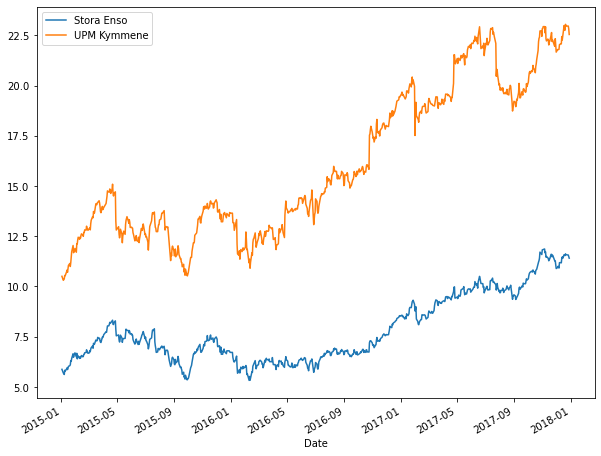

In [9]:
enso['Adj Close'].plot(figsize=(10,8), label= 'Stora Enso')
upm['Adj Close'].plot(label= 'UPM Kymmene')
plt.legend()

In [11]:
np.corrcoef(enso['Adj Close'],upm['Adj Close'])

array([[1.        , 0.91967717],
       [0.91967717, 1.        ]])

So Stora Enso and UPM Kymmene has a high correlation (0,9197) between their prices, but let's look their spread.

In [12]:
spread = upm['Adj Close']-enso['Adj Close']

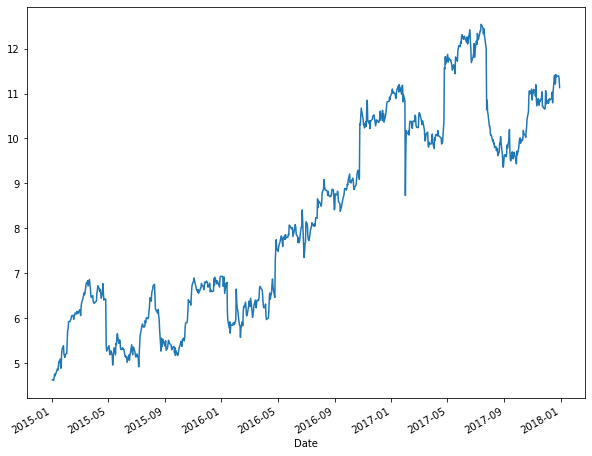

In [14]:
spread.plot(figsize = (10,8));

From this picture we see that the spread gets larger as time passes. So these two stocks are not cointegrated. So they are correlated but not cointegrated. 

## Microsoft and Apple

In [18]:
start1 = '2015-01-01'
end1 = '2018-01-01'

msft = web.DataReader('MSFT', data_source = 'yahoo', start= start1, end= end1 )
aapl = web.DataReader('AAPL', data_source = 'yahoo', start= start1, end= end1 )

In [19]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


In [20]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       755 non-null    float64
 1   Low        755 non-null    float64
 2   Open       755 non-null    float64
 3   Close      755 non-null    float64
 4   Volume     755 non-null    float64
 5   Adj Close  755 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


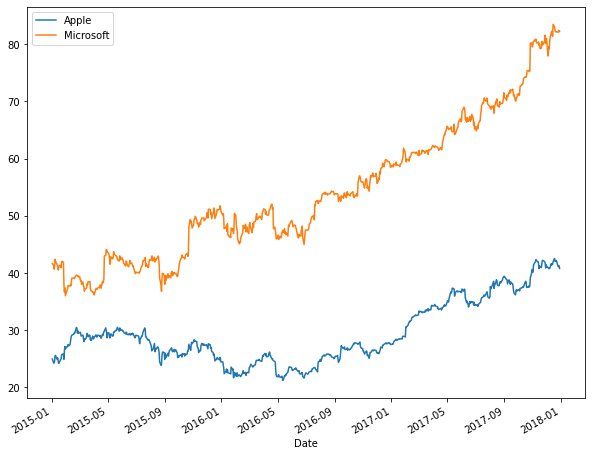

In [21]:
aapl['Adj Close'].plot(figsize=(10,8), label= 'Apple')
msft['Adj Close'].plot(label= 'Microsoft')
plt.legend();

In [22]:
np.corrcoef(msft['Adj Close'],aapl['Adj Close'])

array([[1.        , 0.79692202],
       [0.79692202, 1.        ]])

In [23]:
spread_tech = msft['Adj Close']-aapl['Adj Close']

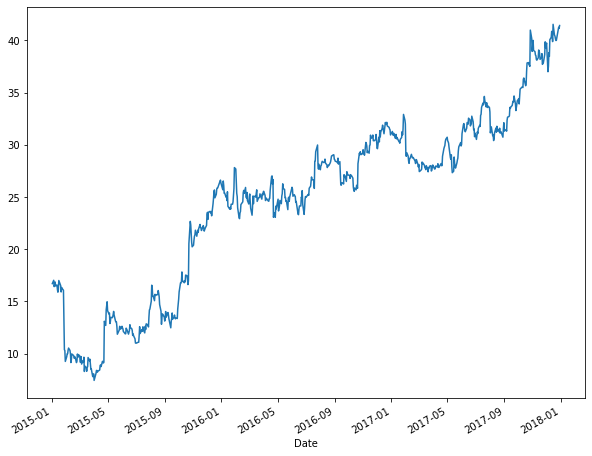

In [25]:
spread_tech.plot(figsize=(10,8));

These two stocks are correlated but not so highly and they are not cointegrated since their spread also gets larger over time.

## Brent Oil Futures and Crude Oil WTI Futures
Data for these Futures is taken from Investing.com. Downloaded .csv -files from there. Have to remember that there is always the rolling of the contracts, but I assume now that the Investing.com has done it reasonably. It is just to keep well in mind that close to those rolling days it really matters that what contract is in use.

In [9]:
brent_f = pd.read_csv('Brent Oil Futures Historical Data.csv', index_col='Date', parse_dates=True)
wti_f = pd.read_csv('Crude Oil WTI Futures Historical Data.csv', index_col='Date', parse_dates=True)

In [10]:
brent_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2605 entries, 2020-09-25 to 2010-08-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2605 non-null   float64
 1   Open      2605 non-null   float64
 2   High      2605 non-null   float64
 3   Low       2605 non-null   float64
 4   Vol.      2605 non-null   object 
 5   Change %  2605 non-null   object 
dtypes: float64(4), object(2)
memory usage: 142.5+ KB


In [11]:
wti_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2624 entries, 2020-09-25 to 2010-08-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2624 non-null   float64
 1   Open      2624 non-null   float64
 2   High      2624 non-null   float64
 3   Low       2624 non-null   float64
 4   Vol.      2624 non-null   object 
 5   Change %  2624 non-null   object 
dtypes: float64(4), object(2)
memory usage: 143.5+ KB


In [12]:
brent_f.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-09-25,41.92,41.85,42.33,41.52,129.40K,-0.05%
2020-09-24,41.94,41.36,42.02,41.27,162.93K,0.41%
2020-09-23,41.77,41.67,42.62,41.21,183.88K,0.12%
2020-09-22,41.72,41.79,42.20,41.21,210.74K,0.68%
2020-09-21,41.44,43.01,43.30,40.96,217.36K,-3.96%


In [13]:
wti_f.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-09-25,40.25,40.15,40.64,39.71,-,-0.15%
2020-09-24,40.31,39.60,40.37,39.12,269.99K,0.95%
2020-09-23,39.93,39.76,40.75,39.26,318.75K,0.83%
2020-09-22,39.60,39.63,40.02,39.00,23.22K,0.74%
2020-09-21,39.31,40.98,41.27,38.66,33.73K,-4.38%


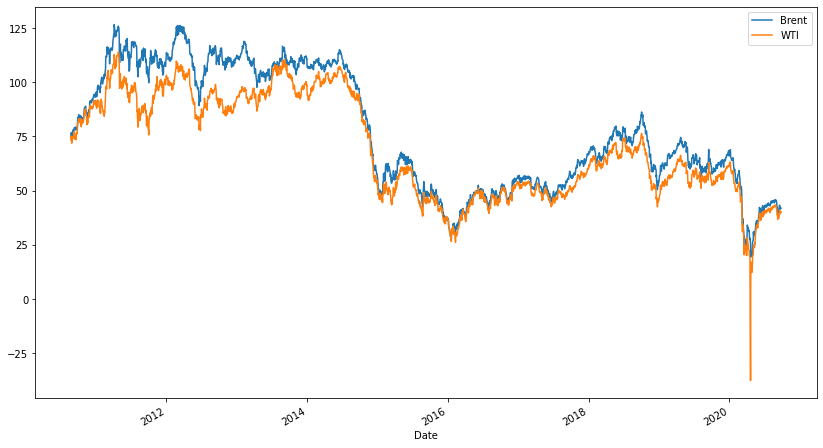

In [14]:
brent_f['Price'].plot(figsize=(14,8), label = 'Brent')
wti_f['Price'].plot(label = 'WTI')
plt.legend();

For calculating the correlation we have to do little bit datahandling so that we get the dataframes to be equal size. Right now because of the different traiding days wti_f has 19 entries more. Because we only need the prices, let's make a new dataframe.

In [20]:
wti_brent_fut = pd.concat([wti_f['Price'],brent_f['Price']],axis=1)

In [22]:
wti_brent_fut.columns=['WTI','Brent']

In [23]:
wti_brent_fut.head()

,WTI,Brent
Date,,
2010-08-26,73.36,75.02
2010-08-27,75.17,76.65
2010-08-30,74.70,76.60
2010-08-31,71.92,74.64
2010-09-01,73.91,76.35


In [24]:
wti_brent_fut.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2641 entries, 2010-08-26 to 2020-09-25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTI     2624 non-null   float64
 1   Brent   2605 non-null   float64
dtypes: float64(2)
memory usage: 61.9 KB


In [26]:
wti_brent_fut.dropna(inplace=True)

In [27]:
wti_brent_fut.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2588 entries, 2010-08-26 to 2020-09-25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WTI     2588 non-null   float64
 1   Brent   2588 non-null   float64
dtypes: float64(2)
memory usage: 60.7 KB


Now we have equal amount of data about the prices and we can proceed to calculate correlation.

In [29]:
np.corrcoef(wti_brent_fut['WTI'],wti_brent_fut['Brent'])

array([[1.        , 0.98327998],
       [0.98327998, 1.        ]])

As expected they have a high correlation as it should be. Next look their price difference.

In [30]:
wti_brent_fut['Difference']=wti_brent_fut['Brent']-wti_brent_fut['WTI'] 

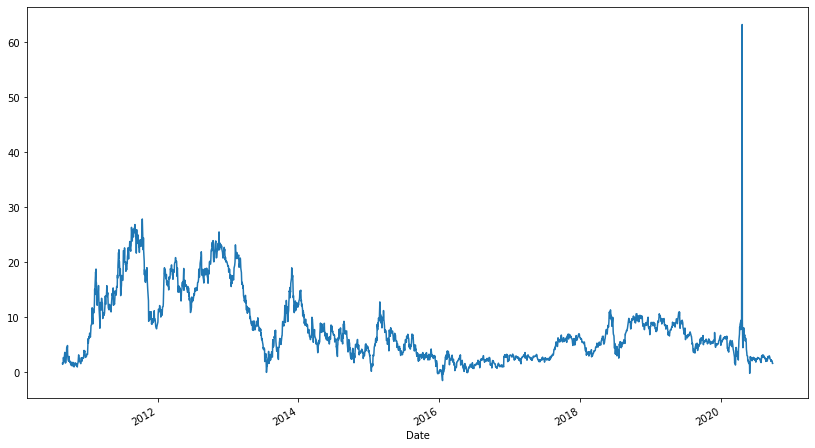

In [31]:
wti_brent_fut['Difference'].plot(figsize=(14,8))

That huge spike is when WTI Future contracts drop to negative April 20th 2020. 

In [32]:
wti_brent_fut.describe()

,WTI,Brent,Difference
count,2588.000000,2588.000000,2588.000000
mean,69.500800,77.265085,7.764285
std,23.684633,27.532345,6.050696
min,-37.630000,19.330000,-1.470000
25%,49.587500,53.815000,3.007500
50%,63.100000,69.455000,6.000000
75%,93.360000,107.672500,10.052500
max,113.930000,126.650000,63.200000
